In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D

Using TensorFlow backend.


In [2]:
max_features = 20000
text_max_words = 200

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

In [5]:
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

In [6]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

W0810 06:54:37.681493 139999756277376 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 06:54:37.728997 139999756277376 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 06:54:37.732906 139999756277376 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 06:54:37.794549 139999756277376 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/ke

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0810 06:54:40.308037 139999756277376 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 06:54:40.410242 139999756277376 deprecation_wrapper.py:119] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0810 06:54:40.432384 139999756277376 deprecation.py:323] From /home/gonapps/.local/share/virtualenvs/keras-hryKYpEs/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 130s 7ms/step - loss: 0.0961 - acc: 0.9675 - val_loss: 0.3708 - val_acc: 0.8626
Epoch 2/25
20000/20000 [==============================] - 127s 6ms/step - loss: 0.0497 - acc: 0.9849 - val_loss: 0.4416 - val_acc: 0.8610
Epoch 3/25
20000/20000 [==============================] - 355s 18ms/step - loss: 0.0300 - acc: 0.9906 - val_loss: 0.6027 - val_acc: 0.8424
Epoch 4/25
20000/20000 [==============================] - 169s 8ms/step - loss: 0.0254 - acc: 0.9913 - val_loss: 0.6555 - val_acc: 0.8592
Epoch 5/25
20000/20000 [==============================] - 156s 8ms/step - loss: 0.0152 - acc: 0.9953 - val_loss: 0.7620 - val_acc: 0.8498
Epoch 6/25
20000/20000 [==============================] - 168s 8ms/step - loss: 0.0130 - acc: 0.9960 - val_loss: 0.8138 - val_acc: 0.8580
Epoch 7/25
20000/20000 [==============================] - 184s 9ms/step - loss: 0.0178 - acc: 0.9940 - val_loss: 0.6946 - 

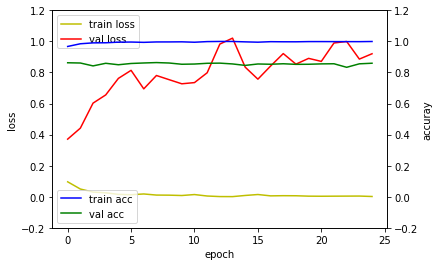

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [13]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 27s 1ms/step
## evaluation loss and_metrics ##
[1.0604128855514527, 0.838959999961853]
